In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr as R
from sklearn import metrics
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
import random
random.seed(42)

In [3]:
sns.set(style='whitegrid', font_scale=1.75)

In [4]:
def calc_stats(array1, array2):
    rmse=np.sqrt(np.mean((array1.reshape(-1,1)-array2.reshape(-1,1))**2))
    r, _ = R(array1.ravel(), array2.ravel())
    return rmse, r

In [5]:
def calc_auc(true, pred):
    auc=metrics.roc_auc_score(true.ravel(), pred.ravel())
    fpr, tpr, _ = metrics.roc_curve(true.ravel(), pred.ravel())
    return auc, fpr, tpr

In [6]:
def get_results(listo_files, selection=' pose '):
    initial_results=[]
    for fname in listo_files:
        with open(fname) as infile:
            for line in infile:
                if selection in line:
                    items=line.rstrip().split()
                    rmse=float(items[2])
                    R = float(items[3])
                    auc=float(items[5])
                    top=float(items[-1])
                
                    initial_results.append((rmse,R,auc,top))
    return initial_results

# Analyzing the differences between imputed and not

In [7]:
initial_files=glob.glob('results/it2_retrain_it0/*.summary')
imputed_files=glob.glob('results/it2_imputation_it0/*.summary')
imputed_it1=glob.glob('results/it2_imputation_it1/*.summary')
imputed_it2=glob.glob('results/it2_imputation_it2/*.summary')
imputed_it3=glob.glob('results/it2_imputation_it3/*.summary')
imputed_it4=glob.glob('results/it2_imputation_it4/*.summary')
imputed_it5=glob.glob('results/it2_imputation_it5/*.summary')

imputed_mean_it1=glob.glob('results/it2_mean_imputation_it1/*.summary')
imputed_mean_it2=glob.glob('results/it2_mean_imputation_it2/*.summary')
imputed_mean_it3=glob.glob('results/it2_mean_imputation_it3/*.summary')
imputed_mean_it4=glob.glob('results/it2_mean_imputation_it4/*.summary')
imputed_mean_it5=glob.glob('results/it2_mean_imputation_it5/*.summary')
imputed_mean_it6=glob.glob('results/it2_mean_imputation_it6/*.summary')

In [8]:
first_results=get_results(initial_files)
imputed_100=get_results(imputed_files)

In [9]:
imputed_it1=get_results(imputed_it1)
imputed_it2=get_results(imputed_it2)
imputed_it3=get_results(imputed_it3)
imputed_it4=get_results(imputed_it4)
imputed_it5=get_results(imputed_it5)

imputed_mean_it1=get_results(imputed_mean_it1)
imputed_mean_it2=get_results(imputed_mean_it2)
imputed_mean_it3=get_results(imputed_mean_it3)
imputed_mean_it4=get_results(imputed_mean_it4)
imputed_mean_it5=get_results(imputed_mean_it5)
imputed_mean_it6=get_results(imputed_mean_it6)

In [10]:
with open('results/comparison.csv','w') as outfile:
    outfile.write('Imputation Iteration #,RMSE,R,AUC,Top1,Scoring\n')
    for i,listo in enumerate([first_results,imputed_100,imputed_it1,imputed_it2,imputed_it3,imputed_it4,
                              imputed_it5]):
        for rmse,r,auc,top in listo:
            flag=i
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Individual\n')
    for j,listo in enumerate([first_results,imputed_mean_it1,imputed_mean_it2, imputed_mean_it3,imputed_mean_it4,
                              imputed_mean_it5,imputed_mean_it6]):
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{j},{rmse},{r},{auc},{top},Ensemble\n')

In [11]:
df=pd.read_csv('results/comparison.csv')

In [12]:
ens=df[df['Scoring']=='Ensemble']
for imp in set(ens['Imputation Iteration #']):
    tmp2=ens[ens['Imputation Iteration #']==imp].mean()
    print(imp, tmp2['RMSE'], tmp2['Top1'])

0 1.4695715892396626 0.47290485545888294
1 1.4531958482196632 0.481335952848723
2 1.4474707314421533 0.48135840583777717
3 1.4502470701317811 0.4779792309851249
4 1.4510799685476925 0.481335952848723
5 1.4507651351785804 0.47813640190850404
6 1.4529431364425578 0.47919169239404996


In [13]:
ens=df[df['Scoring']=='Individual']
for imp in set(ens['Imputation Iteration #']):
    tmp2=ens[ens['Imputation Iteration #']==imp].mean()
    print(imp, tmp2['RMSE'], tmp2['Top1'])

0 1.4695715892396626 0.47290485545888294
1 1.4589159698457894 0.47595846197024977
2 1.4539429090068334 0.48031434184675836
3 1.4539203829067318 0.4757788380578164
4 1.4596156447310855 0.47709233791748523
5 1.4515923984512031 0.47663205164187483
6 1.4565046760926914 0.4768565815324165


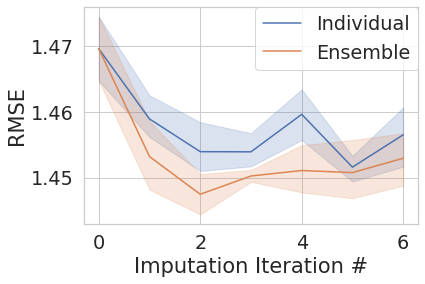

In [14]:
sns.lineplot(data=df,x='Imputation Iteration #',y='RMSE',hue='Scoring',ci=95)
plt.legend(loc='best',borderaxespad=0,title='')
#plt.savefig('figures/InitialImpRMSE.pdf',bbox_inches='tight')
plt.savefig('figures/InitialImpRMSE.png',bbox_inches='tight',dpi=300)

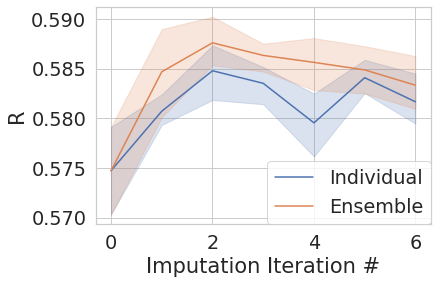

In [15]:
sns.lineplot(data=df,x='Imputation Iteration #',y='R',hue='Scoring',ci=95)
plt.legend(loc='best',borderaxespad=0,title='')
#lt.savefig('figures/InitialImpR.pdf',bbox_inches='tight')
plt.savefig('figures/InitialImpR.png',bbox_inches='tight',dpi=300)

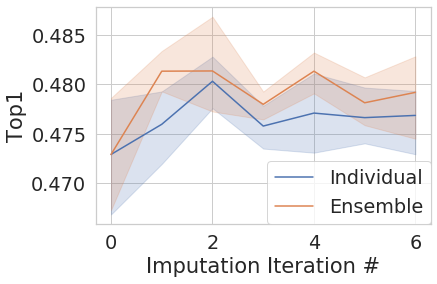

In [16]:
sns.lineplot(data=df,x='Imputation Iteration #',y='Top1',hue='Scoring',ci=95)
plt.legend(borderaxespad=0,title='',ncol=1,loc='lower right')
plt.savefig('figures/InitialImpTop1.pdf',bbox_inches='tight')

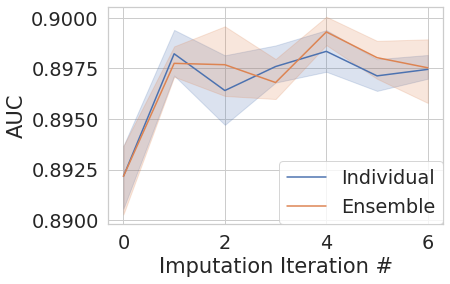

In [17]:
sns.lineplot(data=df,x='Imputation Iteration #',y='AUC',hue='Scoring',ci=95)
plt.legend(loc='best',borderaxespad=0,title='')
plt.savefig('figures/InitialImpAUC.pdf',bbox_inches='tight')

# Comparing results for the first iteration of the different methods

In [18]:
initial_files=glob.glob('results/it2_retrain_it0/*.summary')
imputed_files=glob.glob('results/it2_imputation_it0/*.summary')
imputed_mean_it1=glob.glob('results/it2_mean_imputation_it1/*.summary')

imputed_med_perpose_it1=glob.glob('results/it2_med_imp_it1/*.summary')
imputed_min_perpose_it1=glob.glob('results/it2_min_imp_it1/*.summary')
imputed_max_perpose_it1=glob.glob('results/it2_max_imp_it1/*.summary')

imputed_med_goodonly_perpose_it1=glob.glob('results/it2_goodonly_med_imp_it1/*.summary')
imputed_min_goodonly_perpose_it1=glob.glob('results/it2_goodonly_min_imp_it1/*.summary')
imputed_max_goodonly_perpose_it1=glob.glob('results/it2_goodonly_max_imp_it1/*.summary')

imputed_med_goodonly_perpose_it2=glob.glob('results/it2_goodonly_med_imp_it2/*.summary')

In [19]:
first_results=get_results(initial_files)
indiv_non_ens=get_results(imputed_files)
indiv_mean_ens=get_results(imputed_mean_it1)

med_perpose_end=get_results(imputed_med_perpose_it1)
min_perpose_end=get_results(imputed_min_perpose_it1)
max_perpose_end=get_results(imputed_max_perpose_it1)

med_goodonly_perpose_end=get_results(imputed_med_goodonly_perpose_it1)
min_goodonly_perpose_end=get_results(imputed_min_goodonly_perpose_it1)
max_goodonly_perpose_end=get_results(imputed_max_goodonly_perpose_it1)

med_goodonly_perpose_end_it2=get_results(imputed_med_goodonly_perpose_it2)

In [20]:
with open('results/Diff_combo_comparison.csv','w') as outfile:
    outfile.write('Imputation Iteration #,RMSE,R,AUC,Top1,Imputation Type\n')
    
    for i, listo in enumerate([first_results]):
        flag=i
        for rmse,r,auc,top in listo:
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Initial\n')
            
    #starting with the individual non-ensemble
    for i,listo in enumerate([indiv_non_ens]):
        flag=i+1
        for rmse,r,auc,top in listo:
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Individual\n')
    
    #individual ensembled
    for j,listo in enumerate([indiv_mean_ens]):
        flag=j+1
        for rmse,r,auc,top in listo:
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Individual Ensemble\n')
    
    #Median per-pose ens
    for j,listo in enumerate([med_perpose_end]):
        flag=j+1
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Ensemble Median\n')
    
    #median good only ensemble
    for j,listo in enumerate([med_goodonly_perpose_end,med_goodonly_perpose_end_it2]):
        flag=j+1
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Ensemble Good Only Median\n')
    
    #Max per-pose ens
    for j,listo in enumerate([max_perpose_end]):
        flag=j+1
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Ensemble Max\n')
    
    #max good only ensemble
    for j,listo in enumerate([max_goodonly_perpose_end]):
        flag=j+1
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Ensemble Good Only Max\n')

    #Min per-pose ens
    for j,listo in enumerate([min_perpose_end]):
        flag=j+1
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Ensemble Min\n')
            
    #min good only ensemble
    for j,listo in enumerate([min_goodonly_perpose_end]):
        flag=j+1
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Ensemble Good Only Min\n')

In [21]:
df=pd.read_csv('results/Diff_combo_comparison.csv')

start_mean=df[df['Imputation Type']=='Initial'].mean()

for v in ['RMSE','R','AUC','Top1']:
    val=start_mean[v]
    df[f'Delta {v}']=df[v]-val

In [22]:
df

,Imputation Iteration #,RMSE,R,AUC,Top1,Imputation Type,Delta RMSE,Delta R,Delta AUC,Delta Top1
0,0,1.467429,0.575690,0.893609,0.477800,Initial,-0.002142,0.000969,0.001440,0.004895
1,0,1.466545,0.578673,0.893312,0.476509,Initial,-0.003026,0.003952,0.001143,0.003604
2,0,1.474927,0.567174,0.891253,0.467078,Initial,0.005356,-0.007547,-0.000916,-0.005827
3,0,1.477470,0.570768,0.893910,0.480045,Initial,0.007899,-0.003952,0.001741,0.007140
4,0,1.461486,0.581298,0.888762,0.463093,Initial,-0.008085,0.006577,-0.003407,-0.009812
5,1,1.459491,0.580892,0.900318,0.480662,Individual,-0.010080,0.006172,0.008149,0.007758
6,1,1.457339,0.578693,0.898014,0.479147,Individual,-0.012233,0.003973,0.005845,0.006242
7,1,1.464980,0.580260,0.898399,0.475274,Individual,-0.004591,0.005540,0.006230,0.002369
8,1,1.458796,0.579662,0.897798,0.468425,Individual,-0.010775,0.004941,0.005629,-0.004479
9,1,1.453973,0.584038,0.896563,0.476284,Individual,-0.015598,0.009317,0.004394,0.003379


In [24]:
base=df[df['Imputation Type']=='Initial']
for key in list(set(df['Imputation Type'])):
    if key == 'Initial':
        continue
    tmp=df[df['Imputation Type']==key]
    print('----')
    print(key)
    for val in ['RMSE','R','AUC','Top1']:
        print(val)
        print(ttest_ind(base[base['Imputation Iteration #']==0][val], tmp[tmp['Imputation Iteration #']==1][val]))
    print('----')

----
Individual Ensemble
RMSE
Ttest_indResult(statistic=3.857701619737092, pvalue=0.00482459882868894)
R
Ttest_indResult(statistic=-2.743791557116219, pvalue=0.025300514532092103)
AUC
Ttest_indResult(statistic=-5.2698184507879695, pvalue=0.0007554603394999562)
Top1
Ttest_indResult(statistic=-2.3983575203294674, pvalue=0.043287539378583824)
----
----
Ensemble Good Only Min
RMSE
Ttest_indResult(statistic=-8.025728609994568, pvalue=4.2670197659682583e-05)
R
Ttest_indResult(statistic=-4.493862327578782, pvalue=0.00201840930763275)
AUC
Ttest_indResult(statistic=-2.8390370377334455, pvalue=0.02184430423677954)
Top1
Ttest_indResult(statistic=-1.0511508946551558, pvalue=0.32390186211668076)
----
----
Individual
RMSE
Ttest_indResult(statistic=3.113657448783651, pvalue=0.014365799355378732)
R
Ttest_indResult(statistic=-2.1950179930414015, pvalue=0.059453993610911186)
AUC
Ttest_indResult(statistic=-5.27937298629542, pvalue=0.0007467731078361846)
Top1
Ttest_indResult(statistic=-0.7784323100203929,

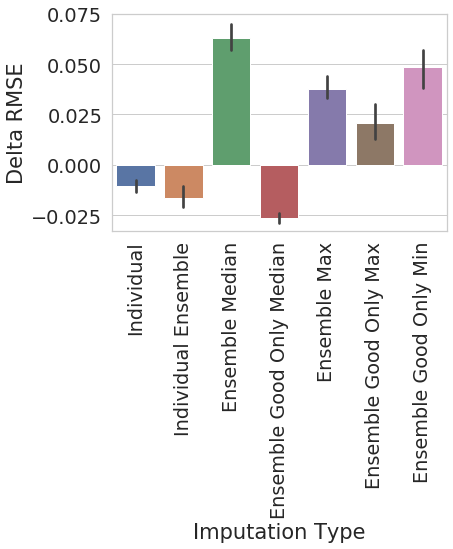

In [46]:
tmp=df[df['Imputation Iteration #']==1]
tmp2=tmp[~(tmp['Imputation Type']=='Ensemble Min')]
sns.barplot(data=tmp2, x='Imputation Type',y='Delta RMSE')
plt.xticks(rotation=90)
plt.ylim((-0.033,0.075))
plt.savefig('figures/ComparingImpStylesRMSE.pdf',dpi=300,bbox_inches='tight')

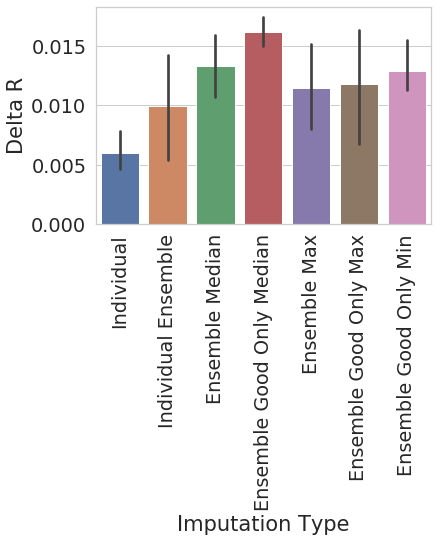

In [47]:
tmp=df[df['Imputation Iteration #']==1]
tmp2=tmp[~(tmp['Imputation Type']=='Ensemble Min')]
sns.barplot(data=tmp2, x='Imputation Type',y='Delta R')
plt.xticks(rotation=90)
#plt.ylim((-0.033,0.075))
plt.savefig('figures/ComparingImpStylesR.pdf',dpi=300,bbox_inches='tight')

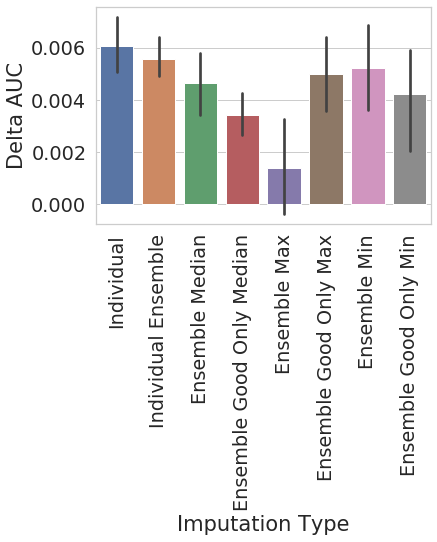

In [27]:
tmp=df[df['Imputation Iteration #']==1]
tmp2=tmp[~(tmp['Imputation Type']=='Min_Ens')]
sns.barplot(data=tmp2, x='Imputation Type',y='Delta AUC')
plt.xticks(rotation=90)
plt.savefig('figures/ComparingImpStylesAUC.pdf',bbox_inches='tight')

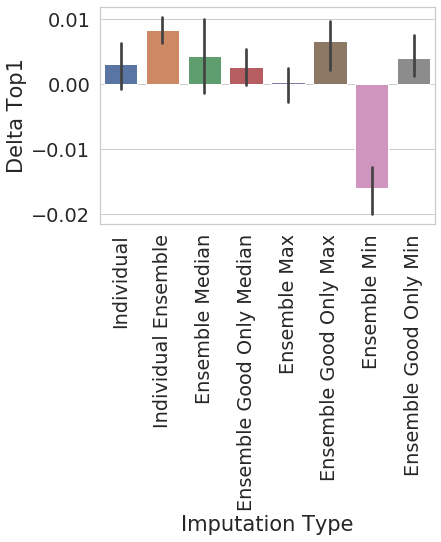

In [28]:
tmp=df[df['Imputation Iteration #']==1]
tmp2=tmp[~(tmp['Imputation Type']=='Min_Ens')]
sns.barplot(data=tmp2, x='Imputation Type',y='Delta Top1')
plt.xticks(rotation=90)
plt.savefig('figures/ComparingImpStylesTop1.pdf',bbox_inches='tight')

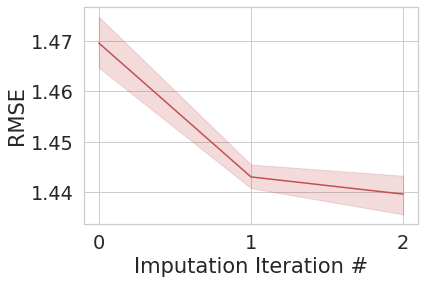

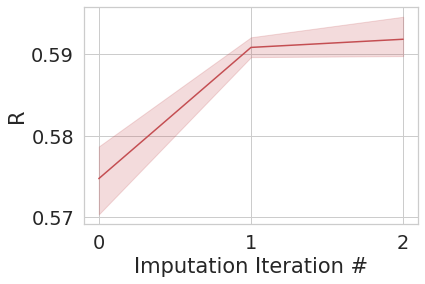

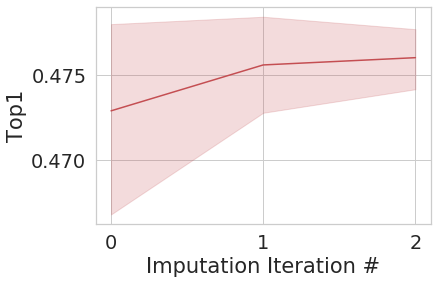

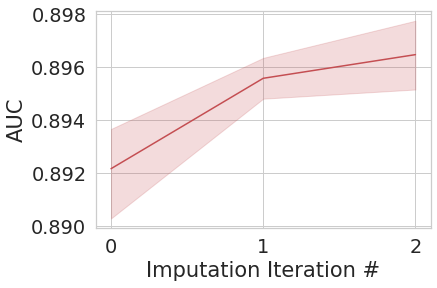

In [45]:
mask1=df['Imputation Type']=='Ensemble Good Only Median' 
mask2=df['Imputation Type']=='Initial'
tmp=df[mask1|mask2]
sns.lineplot(data=tmp,x='Imputation Iteration #',y='RMSE',ci=95,color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
plt.xticks(ticks=[0,1,2],labels=['0','1','2'])
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
#plt.savefig('figures/MedGOEnsRMSE.pdf',bbox_inches='tight')
plt.savefig('figures/MedGOEnsRMSE.png',bbox_inches='tight',dpi=300)
plt.show()

sns.lineplot(data=tmp,x='Imputation Iteration #',y='R',ci=95,color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
plt.xticks(ticks=[0,1,2],labels=['0','1','2'])
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
#plt.savefig('figures/MedGOEnsR.pdf',bbox_inches='tight')
plt.savefig('figures/MedGOEnsR.png',bbox_inches='tight',dpi=300)
plt.show()

sns.lineplot(data=tmp,x='Imputation Iteration #',y='Top1',ci=95,color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
plt.xticks(ticks=[0,1,2],labels=['0','1','2'])
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEnsTop1.pdf',bbox_inches='tight')
plt.show()

sns.lineplot(data=tmp,x='Imputation Iteration #',y='AUC',ci=95,color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
plt.xticks(ticks=[0,1,2],labels=['0','1','2'])
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEnsAUC.pdf',bbox_inches='tight')
plt.show()

# Invesitgating randomly adding more imputation

In [29]:
initial_files=glob.glob('results/it2_retrain_it0/*.summary') #0% imputed
percent_impute_20=glob.glob('results/it2_goodonly_prog_med_imp_it1/*20pa*.summary')
percent_impute_40=glob.glob('results/it2_goodonly_prog_med_imp_it1/*40pa*.summary')
percent_impute_60=glob.glob('results/it2_goodonly_prog_med_imp_it1/*60pa*.summary')
percent_impute_80=glob.glob('results/it2_goodonly_prog_med_imp_it1/*80pa*.summary')
imputed_med_goodonly_perpose_it1=glob.glob('results/it2_goodonly_med_imp_it1/*.summary') #100% imputed

first_results=get_results(initial_files)
pa20_restuls=get_results(percent_impute_20)
pa40_restuls=get_results(percent_impute_40)
pa60_restuls=get_results(percent_impute_60)
pa80_restuls=get_results(percent_impute_80)
med_goodonly_perpose_end=get_results(imputed_med_goodonly_perpose_it1)

In [30]:
with open('results/percent_imputed_compare_it1.csv','w') as outfile:
    outfile.write('Percent Imputed,RMSE,R,AUC,Top1\n')
    
    #starting with the individual non-ensemble
    for i,listo in enumerate([first_results,pa20_restuls,pa40_restuls,pa60_restuls,pa80_restuls,med_goodonly_perpose_end]):
        for rmse,r,auc,top in listo:
            flag=i*20
            outfile.write(f'{flag},{rmse},{r},{auc},{top}\n')

In [31]:
df=pd.read_csv('results/percent_imputed_compare_it1.csv')

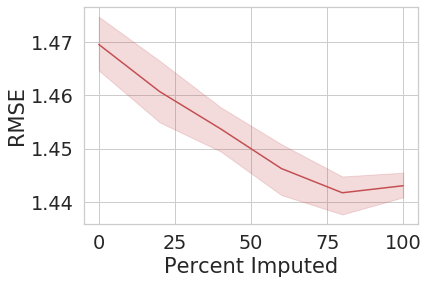

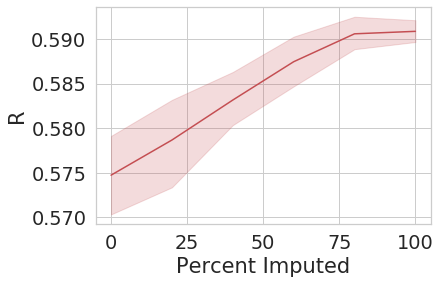

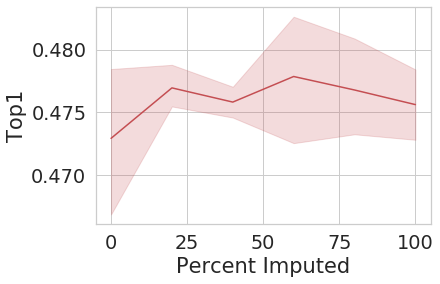

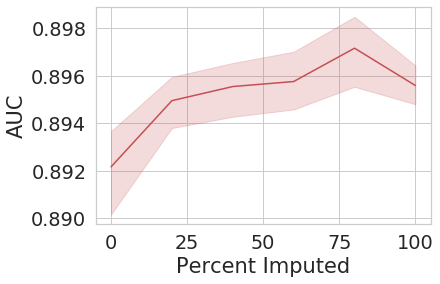

In [32]:
ax=sns.lineplot(data=df,x='Percent Imputed',y='RMSE',ci=95,color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEns_addingImpRMSE.pdf',bbox_inches='tight')
plt.show()

ax=sns.lineplot(data=df,x='Percent Imputed',y='R',ci=95,color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEns_addingImpR.pdf',bbox_inches='tight')
plt.show()

ax=sns.lineplot(data=df,x='Percent Imputed',y='Top1',ci=95,color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEns_addingImpTop1.pdf',bbox_inches='tight')
plt.show()

ax=sns.lineplot(data=df,x='Percent Imputed',y='AUC',ci=95,color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEns_addingImpAUC.pdf',bbox_inches='tight')
plt.show()

# Generating the data utilized for the Roche test set

In [5]:
root='results/roche_crystal_testset/'

In [7]:
fold_datadic={} #dictionary of model -> fold -> [prediction array] for each seed

for modelprefix in ['og_s','med_GO_ens_it1_s','med_GO_ens_it2_s']:
    fold_datadic[modelprefix]={}
    fold_datadic['truth']=None
    for fold in range(3):
        fold_datadic[modelprefix][fold]=[]
        for seed in range(5):
            file=glob.glob(f'{root}{modelprefix}{seed}.{fold}*.predictions')
            assert len(file)==1
            with open(file[0]) as infile:
                preds=[]
                true=[]
                for line in infile:
                    if line.startswith('#'):
                        continue
                    else:
                        items=line.rstrip().split()
                        preds.append(float(items[1]))
                        true.append(float(items[4]))
                        
                fold_datadic[modelprefix][fold].append(np.array(preds))
                fold_datadic['truth']=np.array(true)

In [9]:
#computing and printing the per-fold rmses & storing the 10,000 bootstrapped rmses
fold_boots={}
for fold in range(3):
    for key in ['og_s','med_GO_ens_it1_s','med_GO_ens_it2_s']:
        if key not in fold_boots:
            fold_boots[key]={}
        fold_boots[key][fold]={}
        base=np.zeros_like(fold_datadic[key][fold][0])
        for array in fold_datadic[key][fold]:
            base+=array
        base/=5
        T=fold_datadic['truth']
        rmse,_ = calc_stats(base,T)
        print(key,fold,rmse)
        
        N=len(base)
        s_rmses=[]
        for i in range(10000):
            index=random.choices(range(N),k=N)
            #index=[]
            #for j in range(N):
            #    sample_index=random.randint(0,N-1)
            #    index.append(sample_index)
            s_rmse, _ = calc_stats(base[index],T[index])
            s_rmses.append(s_rmse)
        print('---')
        fold_boots[key][fold]['s_rmses']=s_rmses
    print('=========')

og_s 0 1.1314047149388173
---
med_GO_ens_it1_s 0 1.1143440970062677
---
med_GO_ens_it2_s 0 1.1169873354934776
---
og_s 1 1.0468045084234987
---
med_GO_ens_it1_s 1 1.0483859775658189
---
med_GO_ens_it2_s 1 1.0545623761954288
---
og_s 2 1.269592967368562
---
med_GO_ens_it1_s 2 1.1693865412439566
---
med_GO_ens_it2_s 2 1.1548075479723798
---


In [10]:
for fold in range(3):
    for pair in [('og','med_GO_ens_it1'),('og','med_GO_ens_it2'),('med_GO_ens_it1','med_GO_ens_it2')]:
        sample1=np.array(fold_boots[pair[0]+'_s'][fold]['s_rmses'])
        sample2=np.array(fold_boots[pair[1]+'_s'][fold]['s_rmses'])
        
        diffs=sample1-sample2
        print(pair,np.percentile(diffs,(2.5,97.5)))
    print('====')

('og', 'med_GO_ens_it1') [-0.04175626  0.07728515]
('og', 'med_GO_ens_it2') [-0.04456987  0.07464139]
('med_GO_ens_it1', 'med_GO_ens_it2') [-0.06213744  0.05634364]
====
('og', 'med_GO_ens_it1') [-0.05160111  0.04919017]
('og', 'med_GO_ens_it2') [-0.05800978  0.04215452]
('med_GO_ens_it1', 'med_GO_ens_it2') [-0.05640419  0.04476954]
====
('og', 'med_GO_ens_it1') [0.03914319 0.16193079]
('og', 'med_GO_ens_it2') [0.05403218 0.17524766]
('med_GO_ens_it1', 'med_GO_ens_it2') [-0.04257208  0.0725711 ]
====


## doing the same as above but for 1 huge ensemble

In [15]:
fold_boots2={}
for key in ['og_s','med_GO_ens_it1_s','med_GO_ens_it2_s']:
    if key not in fold_boots2:
        fold_boots2[key]={}
    base=np.zeros_like(fold_datadic[key][fold][0])
    for fold in range(3):
        for array in fold_datadic[key][fold]:
            base+=array
    base/=15
    T=fold_datadic['truth']
    rmse,_ = calc_stats(base,T)
    print(key,rmse)

    N=len(base)
    s_rmses=[]
    for i in range(10000):
        index=random.choices(range(N),k=N)
        #index=[]
        #for j in range(N):
        #    sample_index=random.randint(0,N-1)
        #    index.append(sample_index)
        s_rmse, s_r = calc_stats(base[index],T[index])
        s_rmses.append(s_rmse)
    fold_boots2[key]['s_rmses']=s_rmses
print('=========')

og_s 1.1201086094842743
med_GO_ens_it1_s 1.0983217176991107
med_GO_ens_it2_s 1.092556520156191


In [16]:
for pair in [('og','med_GO_ens_it1'),('og','med_GO_ens_it2'),('med_GO_ens_it1','med_GO_ens_it2')]:
    sample1=np.array(fold_boots2[pair[0]+'_s']['s_rmses'])
    sample2=np.array(fold_boots2[pair[1]+'_s']['s_rmses'])

    diffs=sample1-sample2
    print(pair,np.percentile(diffs,(2.5,97.5)))
print('=============')

('og', 'med_GO_ens_it1') [-0.03470957  0.07807961]
('og', 'med_GO_ens_it2') [-0.02957204  0.08229647]
('med_GO_ens_it1', 'med_GO_ens_it2') [-0.0501292   0.06098886]


# Docking performance Analysis for the Roche set

In [9]:
root='results/roche_docked_testset/'
datadic={} #dictionary of model -> seed -> fold -> [predictions]
true_array=None
for modelprefix in ['og_s','med_GO_ens_it1_s','med_GO_ens_it2_s']:
    datadic[modelprefix]={}
    for seed in range(5):
        datadic[modelprefix][seed]={}
        for fold in range(3):
            file=glob.glob(f'{root}{modelprefix}{seed}.{fold}*.predictions')
            assert len(file)==1
            with open(file[0]) as infile:
                preds=[]
                true=[]
                for line in infile:
                    if line.startswith('#'):
                        continue
                    else:
                        #gnina outputs the highest scoring pose first
                        #   so in the predictions file, the __0.gninatypes file is said pose.
                        if line.endswith('__0.gninatypes\n'):
                            items=line.rstrip().split()
                            preds.append(float(items[1]))
                            true.append(abs(float(items[4])))
                datadic[modelprefix][seed][fold]=np.array(preds)
                true_array=np.array(true)
                print(calc_stats(np.array(preds),np.array(true)))
        print('-----')
    print('=========')

(1.1392220772752752, 0.34804247187180565)
(1.1050343952696668, 0.41970567439586987)
(1.2003889809434223, 0.3389138009852973)
-----
(1.1462730786040676, 0.34064215527028)
(1.0677684161237124, 0.41315211205580366)
(1.3224488953399653, 0.2665466147127702)
-----
(1.2194796321606989, 0.3016115911507788)
(1.0877672811739947, 0.3796930078589194)
(1.3031898520150607, 0.3236879983816489)
-----
(1.123802945662636, 0.3565914452221934)
(1.1312274554629698, 0.3692643129596357)
(1.2029589259979405, 0.3336948920200218)
-----
(1.1896797817630178, 0.3089288667505987)
(1.050971986260236, 0.46768842348696105)
(1.3077869115623786, 0.2865862439524953)
-----
(1.1349110069546275, 0.34067865305324324)
(1.0723183133399972, 0.3992387636292936)
(1.1595892306939588, 0.33787310530060044)
-----
(1.1329121802199733, 0.3457808326671313)
(1.112907511646707, 0.3690463990798074)
(1.1960488847469144, 0.31419423671477786)
-----
(1.1266149062634276, 0.3425633524726556)
(1.0519452798081856, 0.4401492439411859)
(1.1685141337

In [10]:
fold_boots4={}
for fold in range(3):
    for key in ['og_s','med_GO_ens_it1_s','med_GO_ens_it2_s']:
        if key not in fold_boots4:
            fold_boots4[key]={}
        fold_boots4[key][fold]={}
        base=np.zeros_like(datadic[key][0][fold])
        for seed in range(5):
            base+=datadic[key][seed][fold]
        base/=5
        T=true_array
        rmse,r = calc_stats(base,T)
        print(key,fold,rmse,r)
        
        N=len(base)
        s_rmses=[]
        s_rs=[]
        for i in range(10000):
            index=random.choices(range(N),k=N)
            #index=[]
            #for j in range(N):
            #    sample_index=random.randint(0,N-1)
            #    index.append(sample_index)
            s_rmse, s_r = calc_stats(base[index],T[index])
            s_rmses.append(s_rmse)
            s_rs.append(s_r)
        print('95% CI - RMSE',np.quantile(s_rmses,0.025),np.quantile(s_rmses,0.975))
        print('---')
        fold_boots4[key][fold]['s_rmses']=s_rmses
    print('=========')

og_s 0 1.1446390843106133 0.3350593692429631
95% CI - RMSE 1.103579352371847 1.1862749284740959
---
med_GO_ens_it1_s 0 1.1283307630879418 0.34370919775266834
95% CI - RMSE 1.087443367250433 1.1691324229969533
---
med_GO_ens_it2_s 0 1.131304111911659 0.335079013364718
95% CI - RMSE 1.0900058315683518 1.1734267135788805
---
og_s 1 1.0756825959103897 0.417501813314307
95% CI - RMSE 1.03937507937022 1.111734204364781
---
med_GO_ens_it1_s 1 1.0734561975024428 0.4078743841742026
95% CI - RMSE 1.0367891898002153 1.1098789672902651
---
med_GO_ens_it2_s 1 1.0765180760815953 0.40474385215195446
95% CI - RMSE 1.0407909545293481 1.112573309284948
---
og_s 2 1.259749352834379 0.3134440288446053
95% CI - RMSE 1.2148302305350887 1.3035960121956527
---
med_GO_ens_it1_s 2 1.1787105032953653 0.33837220555519937
95% CI - RMSE 1.1381671103438742 1.2214056619404818
---
med_GO_ens_it2_s 2 1.1728155548776498 0.3460769118019774
95% CI - RMSE 1.1321608745791372 1.212762186385258
---


In [11]:
#range analysis for the bootstraps -- fold based
for fold in range(3):
    for pair in [('og','med_GO_ens_it1'),('og','med_GO_ens_it2'),('med_GO_ens_it1','med_GO_ens_it2')]:
        sample1=np.array(fold_boots4[pair[0]+'_s'][fold]['s_rmses'])
        sample2=np.array(fold_boots4[pair[1]+'_s'][fold]['s_rmses'])

        diffs=sample1-sample2
        print(pair,np.percentile(diffs,(2.5,97.5)))
    print('=============')

('og', 'med_GO_ens_it1') [-0.04216189  0.07410056]
('og', 'med_GO_ens_it2') [-0.04545994  0.07279837]
('med_GO_ens_it1', 'med_GO_ens_it2') [-0.06199941  0.05504453]
('og', 'med_GO_ens_it1') [-0.04970029  0.05248492]
('og', 'med_GO_ens_it2') [-0.05155064  0.04951478]
('med_GO_ens_it1', 'med_GO_ens_it2') [-0.05326686  0.04778686]
('og', 'med_GO_ens_it1') [0.01826518 0.14103902]
('og', 'med_GO_ens_it2') [0.02685636 0.1457145 ]
('med_GO_ens_it1', 'med_GO_ens_it2') [-0.05042497  0.06495607]


In [12]:
#generating the dic for 1 big ensemble
fold_boots5={}
for key in ['og_s','med_GO_ens_it1_s','med_GO_ens_it2_s']:
    if key not in fold_boots5:
        fold_boots5[key]={}
    base=np.zeros_like(datadic[key][0][fold])
    for fold in range(3):
        for seed in range(5):
            base+=datadic[key][seed][fold]
    base/=15
    T=true_array
    rmse,r = calc_stats(base,T)
    print(key,rmse,r)

    N=len(base)
    s_rmses=[]
    s_rs=[]
    for i in range(10000):
        index=random.choices(range(N),k=N)
        #index=[]
        #for j in range(N):
        #    sample_index=random.randint(0,N-1)
        #    index.append(sample_index)
        s_rmse, s_r = calc_stats(base[index],T[index])
        s_rmses.append(s_rmse)
        s_rs.append(s_r)
    print('95% CI - RMSE',np.quantile(s_rmses,0.025),np.quantile(s_rmses,0.975))
    print('---')
    fold_boots5[key]['s_rmses']=s_rmses
print('=========')

og_s 1.1341959162040276 0.35776788413951793
95% CI - RMSE 1.0942786293869065 1.1745786771714024
---
med_GO_ens_it1_s 1.1158595074868332 0.36452656551077256
95% CI - RMSE 1.0766608765866903 1.154536004725371
---
med_GO_ens_it2_s 1.112297170721552 0.3622682489455429
95% CI - RMSE 1.0734801816877693 1.149969527936833
---


In [13]:
for pair in [('og','med_GO_ens_it1'),('og','med_GO_ens_it2'),('med_GO_ens_it1','med_GO_ens_it2')]:
    sample1=np.array(fold_boots5[pair[0]+'_s']['s_rmses'])
    sample2=np.array(fold_boots5[pair[1]+'_s']['s_rmses'])

    diffs=sample1-sample2
    print(pair,np.percentile(diffs,(2.5,97.5)))
print('=============')

('og', 'med_GO_ens_it1') [-0.03600798  0.0748963 ]
('og', 'med_GO_ens_it2') [-0.03345867  0.07821756]
('med_GO_ens_it1', 'med_GO_ens_it2') [-0.05079552  0.05736181]
